In [4]:
pip install streamlit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 57.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 26.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 59.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.0 MB/s eta 0:00:00
  Created wheel for validators: filename=vali

In [6]:
pip install pandas_datareader


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 60.7 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 7.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np

import pandas as pd

import streamlit as st
import plotly.graph_objects as go

import pandas_datareader as data
import yfinance as yf


In [10]:

start = '2010-01-01'
end = '2019-12-30'
symbols = ['AAPL']
df = yf.download(symbols, start=start, end=end)

df.head()



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [11]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,70.557503,70.662498,69.639999,69.860001,68.241554,275978000
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355133,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421074,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798409,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.771530,146266000


In [12]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [13]:
df = df.drop(['Date', 'Adj Close'], axis= 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], name='Closing Price'))



In [45]:
 df
 

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2509,70.557503,70.662498,69.639999,69.860001,275978000
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200


In [46]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2509    59.012150
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
Name: Close, Length: 2514, dtype: float64

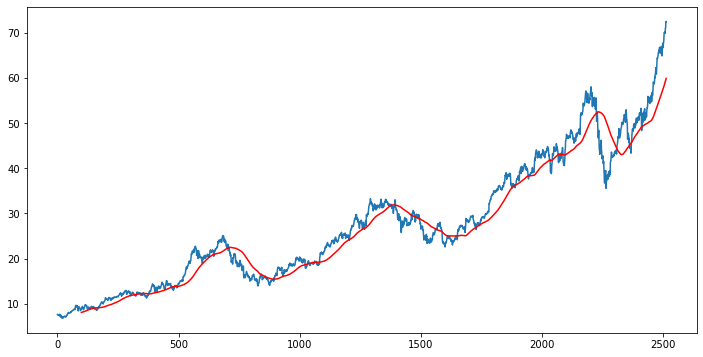

In [47]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [48]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2509    54.000938
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
Name: Close, Length: 2514, dtype: float64

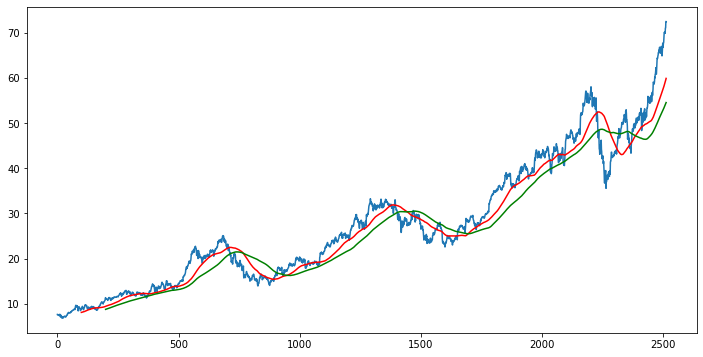

In [49]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [50]:
df.shape

(2514, 5)

In [51]:
data_training = pd.DataFrame (df['Close'][0: int(len(df)*0.70)])

data_testing = pd.DataFrame(df['Close'][int (len(df)*0.70): int(len(df))])


print(data_training.shape)

print(data_testing.shape)

(1759, 1)
(755, 1)


In [52]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [53]:
data_testing.head()

,Close
1759,29.190001
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [55]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84170783],
       [0.84388656],
       [0.85089656]])

In [56]:
data_training_array.shape

(1759, 1)

In [57]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [58]:
x_train.shape

(1659, 100, 1)

In [59]:
# ML Model

In [31]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [60]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [61]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [63]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 14s 175ms/step - loss: 0.0642
Epoch 2/50
52/52 [==============================] - 8s 157ms/step - loss: 0.0136
Epoch 3/50
52/52 [==============================] - 10s 192ms/step - loss: 0.0112
Epoch 4/50
52/52 [==============================] - 11s 214ms/step - loss: 0.0096
Epoch 5/50
52/52 [==============================] - 12s 228ms/step - loss: 0.0091
Epoch 6/50
52/52 [==============================] - 12s 232ms/step - loss: 0.0079
Epoch 7/50
52/52 [==============================] - 12s 233ms/step - loss: 0.0083
Epoch 8/50
52/52 [==============================] - 12s 238ms/step - loss: 0.0088
Epoch 9/50
52/52 [==============================] - 12s 236ms/step - loss: 0.0068
Epoch 10/50
52/52 [==============================] - 12s 226ms/step - loss: 0.0071
Epoch 11/50
52/52 [==============================] - 12s 228ms/step - loss: 0.0070
Epoch 12/50
52/52 [==============================] - 12s 223ms/step - loss: 0.0075
Epoch 13/50
52

In [65]:
model.save('keras_model.h5')

In [66]:
data_testing.head()

,Close
1759,29.190001
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999


In [67]:
data_training .tail(100)

,Close
1659,26.870001
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
...,...
1754,29.237499
1755,29.264999
1756,29.072500
1757,29.129999


In [68]:
 past_100_days = data_training.tail(100)


In [71]:
# final_df = past_100_days.append(data_testing, ignore_index=True)

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [72]:
 final_df.head()

,Close
0,26.870001
1,27.092501
2,27.202499
3,27.000000
4,26.982500


In [73]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02328946],
       [0.02805442],
       [0.03041011],
       [0.02607347],
       [0.0256987 ],
       [0.02703717],
       [0.03399725],
       [0.03346183],
       [0.03260522],
       [0.03185568],
       [0.03335477],
       [0.02880397],
       [0.03062427],
       [0.02623408],
       [0.02377129],
       [0.02039836],
       [0.01975587],
       [0.01536569],
       [0.01590107],
       [0.01927404],
       [0.02462794],
       [0.02446729],
       [0.02800087],
       [0.0127958 ],
       [0.        ],
       [0.01236752],
       [0.02580576],
       [0.04625762],
       [0.06660243],
       [0.06312239],
       [0.0559482 ],
       [0.05589465],
       [0.05578759],
       [0.06151625],
       [0.0512903 ],
       [0.05220045],
       [0.05332476],
       [0.05792911],
       [0.04845274],
       [0.05311064],
       [0.05027304],
       [0.05284293],
       [0.05311064],
       [0.05760789],
       [0.05851804],
       [0.06917232],
       [0.07051079],
       [0.076

In [74]:
input_data.shape

(855, 1)

In [75]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [76]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [77]:
# making predictin
y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 52ms/step


In [78]:
y_predicted.shape

(755, 1)

In [79]:
y_test

array([0.07297358, 0.07281297, 0.0679409 , 0.0697077 , 0.06901167,
       0.07217048, 0.07913056, 0.08491273, 0.08555521, 0.0889817 ,
       0.08630476, 0.08518044, 0.09032017, 0.09026662, 0.08914231,
       0.09032017, 0.0907485 , 0.09015956, 0.10038548, 0.10070674,
       0.10076025, 0.099047  , 0.09754792, 0.13716673, 0.13598887,
       0.13893352, 0.14541169, 0.15205054, 0.154781  , 0.1568155 ,
       0.15520932, 0.16147336, 0.17073566, 0.17335901, 0.17250245,
       0.17448336, 0.17973016, 0.18192527, 0.17882   , 0.17951604,
       0.18096153, 0.18128283, 0.19627366, 0.19183   , 0.19622015,
       0.19386443, 0.19482817, 0.19204412, 0.19033084, 0.19279367,
       0.19311489, 0.19199061, 0.19986084, 0.20109221, 0.19734451,
       0.20521473, 0.19654137, 0.20500053, 0.20232359, 0.2008245 ,
       0.20210947, 0.21774282, 0.21945603, 0.21843877, 0.21699328,
       0.2172074 , 0.2229361 , 0.21892069, 0.21699328, 0.21528   ,
       0.21436984, 0.20612489, 0.20703504, 0.20301962, 0.20719

In [80]:
y_predicted

array([[0.15777636],
       [0.15827358],
       [0.15878639],
       [0.15931259],
       [0.15984488],
       [0.16037378],
       [0.16089462],
       [0.16140035],
       [0.16189079],
       [0.16236947],
       [0.16284025],
       [0.16330379],
       [0.16375737],
       [0.16419736],
       [0.1646241 ],
       [0.16503695],
       [0.16544175],
       [0.16583502],
       [0.16620992],
       [0.16656254],
       [0.16689827],
       [0.16722062],
       [0.16753262],
       [0.16783309],
       [0.16815707],
       [0.16855103],
       [0.16905576],
       [0.16971304],
       [0.17056131],
       [0.17162472],
       [0.17292109],
       [0.17443693],
       [0.17613906],
       [0.17802635],
       [0.18010812],
       [0.18238607],
       [0.18484512],
       [0.18746817],
       [0.19023839],
       [0.19313277],
       [0.19611627],
       [0.19915202],
       [0.20219687],
       [0.20522524],
       [0.20821401],
       [0.2111477 ],
       [0.21401349],
       [0.216

In [81]:
scaler.scale_

array([0.02141557])

In [82]:
scale_factor = 1/0.2141557
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

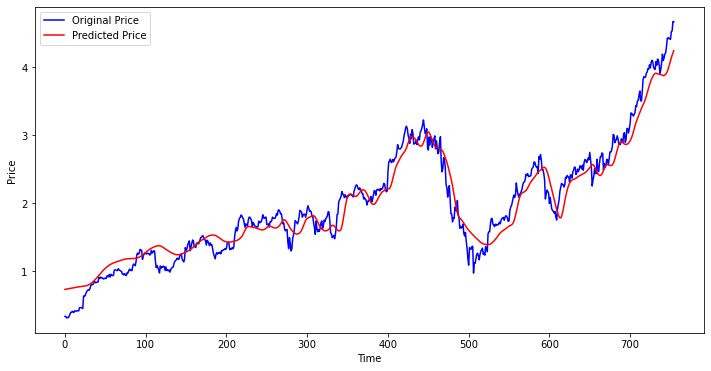

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()